In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

In [2]:

# CSV 파일 로드
data = pd.read_csv('Data/store.csv', encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())
print("\n컬럼 목록:")
print(data.columns)
print("\n데이터 정보:")
print(data.info())


데이터 샘플:
   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드   상권_코드_명 서비스_업종_코드 서비스_업종_코드_명  \
0      20231        U       관광특구  3001491  이태원 관광특구  CS100001       한식음식점   
1      20231        U       관광특구  3001491  이태원 관광특구  CS100002       중식음식점   
2      20231        U       관광특구  3001491  이태원 관광특구  CS100003       일식음식점   
3      20231        U       관광특구  3001491  이태원 관광특구  CS100004       양식음식점   
4      20231        U       관광특구  3001491  이태원 관광특구  CS100005         제과점   

   점포_수  유사_업종_점포_수  개업_율  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수  
0   165         171     4        6     4        7           6  
1    18          18     6        1     6        1           0  
2    22          23     0        0     0        0           1  
3   236         239     2        4     2        4           3  
4    21          26     4        1     0        0           5  

컬럼 목록:
Index(['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포

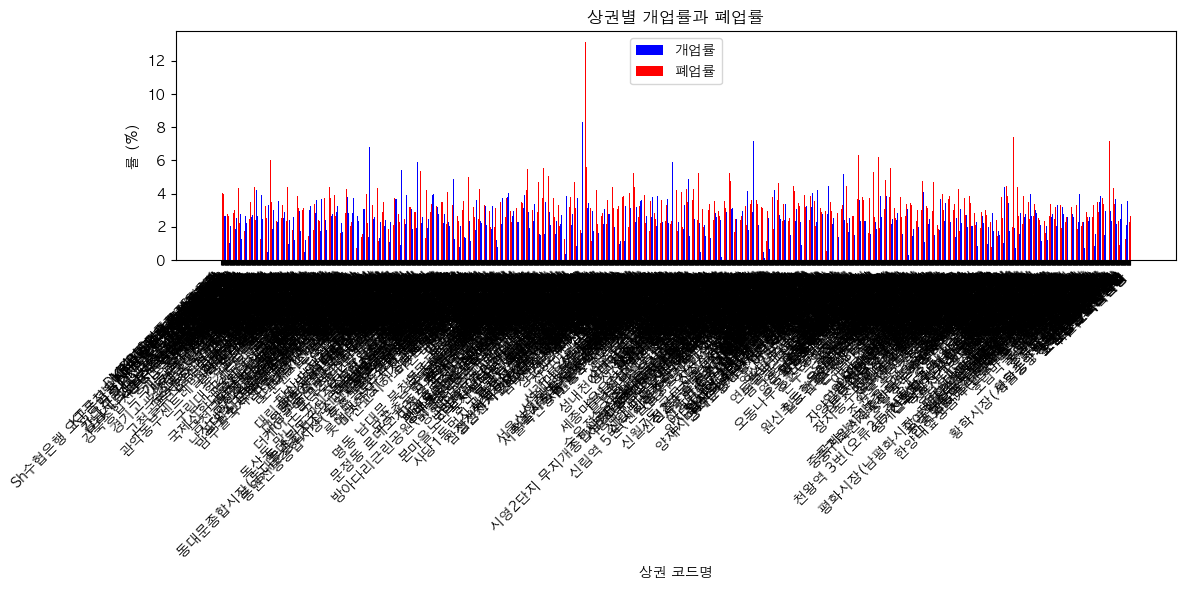

            상권_코드_명  점포_수  개업_점포_수  폐업_점포_수       개업률        폐업률
0      4.19민주묘지역 2번   455       22       18  4.835165   3.956044
1              63빌딩  1413       12       23  0.849257   1.627742
2     DMC(디지털미디어시티)  4167      172      168  4.127670   4.031677
3         GS강동자이아파트   937       26       35  2.774813   3.735326
4               G타워   657       27       26  4.109589   3.957382
...             ...   ...      ...      ...       ...        ...
1644           후암시장   620       14       20  2.258065   3.225806
1645        휘문고교사거리   975       16       15  1.641026   1.538462
1646           흑리단길   829       18       19  2.171291   2.291918
1647        흑석2치안센터    84        0       11  0.000000  13.095238
1648           흑석시장   152        1        4  0.657895   2.631579

[1649 rows x 6 columns]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# 상권별 개업 및 폐업 점포 수 집계
business_summary = data.groupby('상권_코드_명').agg({
    '점포_수': 'sum',
    '개업_점포_수': 'sum',
    '폐업_점포_수': 'sum'
}).reset_index()

# 개업률과 폐업률 계산
business_summary['개업률'] = (business_summary['개업_점포_수'] / business_summary['점포_수']) * 100
business_summary['폐업률'] = (business_summary['폐업_점포_수'] / business_summary['점포_수']) * 100

# 그래프 시각화
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(business_summary))

plt.bar(index, business_summary['개업률'], bar_width, label='개업률', color='blue')
plt.bar([i + bar_width for i in index], business_summary['폐업률'], bar_width, label='폐업률', color='red')

plt.xlabel('상권 코드명')
plt.ylabel('률 (%)')
plt.title('상권별 개업률과 폐업률')
plt.xticks([i + bar_width/2 for i in index], business_summary['상권_코드_명'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

# 결과 출력
print(business_summary)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# pandas 디스플레이 옵션 설정
pd.set_option('display.max_rows', None)  # 모든 행 표시
pd.set_option('display.max_columns', None)  # 모든 열 표시
pd.set_option('display.width', None)  # 너비 제한 해제
pd.set_option('display.float_format', '{:.2f}'.format)  # 소수점 둘째자리까지 표시


# 서비스 업종 코드명별 개업 및 폐업 점포 수 집계
industry_summary = data.groupby('서비스_업종_코드_명').agg({
    '점포_수': 'sum',
    '개업_점포_수': 'sum',
    '폐업_점포_수': 'sum'
}).reset_index()

# 개업률과 폐업률 계산
industry_summary['개업률'] = (industry_summary['개업_점포_수'] / industry_summary['점포_수']) * 100
industry_summary['폐업률'] = (industry_summary['폐업_점포_수'] / industry_summary['점포_수']) * 100

# 결과를 표로 출력
print("\n서비스 업종별 개업 및 폐업 현황:")
print(industry_summary[['서비스_업종_코드_명', '점포_수', '개업_점포_수', '폐업_점포_수', '개업률', '폐업률']])




서비스 업종별 개업 및 폐업 현황:
     서비스_업종_코드_명    점포_수  개업_점포_수  폐업_점포_수   개업률   폐업률
0           DVD방    2105      276      109 13.11  5.18
1            PC방    4416       46      255  1.04  5.77
2             가구   16182      134      263  0.83  1.63
3             가방   17985      308      332  1.71  1.85
4           가전제품   19518      135      201  0.69  1.03
5         가전제품수리   10482      232      148  2.21  1.41
6         가정용품임대    2731        1       43  0.04  1.57
7          건축물청소   12836       21      210  0.16  1.64
8         게스트하우스    4338       21      110  0.48  2.54
9            고시원    1918        0       80  0.00  4.17
10         골프연습장    6873      229      194  3.33  2.82
11       기타법무서비스    7661       39       92  0.51  1.20
12         기타오락장    7054      491      234  6.96  3.32
13           네일숍   15474        3      389  0.02  2.51
14           노래방   28634      797      995  2.78  3.47
15           녹음실    3749        4       60  0.11  1.60
16           당구장   16984      544      721  

In [8]:
data.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20231,U,관광특구,3001491,이태원 관광특구,CS100001,한식음식점,165,171,4,6,4,7,6
1,20231,U,관광특구,3001491,이태원 관광특구,CS100002,중식음식점,18,18,6,1,6,1,0
2,20231,U,관광특구,3001491,이태원 관광특구,CS100003,일식음식점,22,23,0,0,0,0,1
3,20231,U,관광특구,3001491,이태원 관광특구,CS100004,양식음식점,236,239,2,4,2,4,3
4,20231,U,관광특구,3001491,이태원 관광특구,CS100005,제과점,21,26,4,1,0,0,5



분기별 편의점 개업 및 폐업 현황:
   기준_년분기_코드  유사_업종_점포_수  개업_점포_수  폐업_점포_수  개업률  폐업률
0      20231        8110      190      247 2.34 3.05
1      20232        8103      218      231 2.69 2.85
2      20233        8098      196      211 2.42 2.61
3      20234        8061      180      227 2.23 2.82
4      20241        8011      196      253 2.45 3.16
5      20242        7951      217      289 2.73 3.63


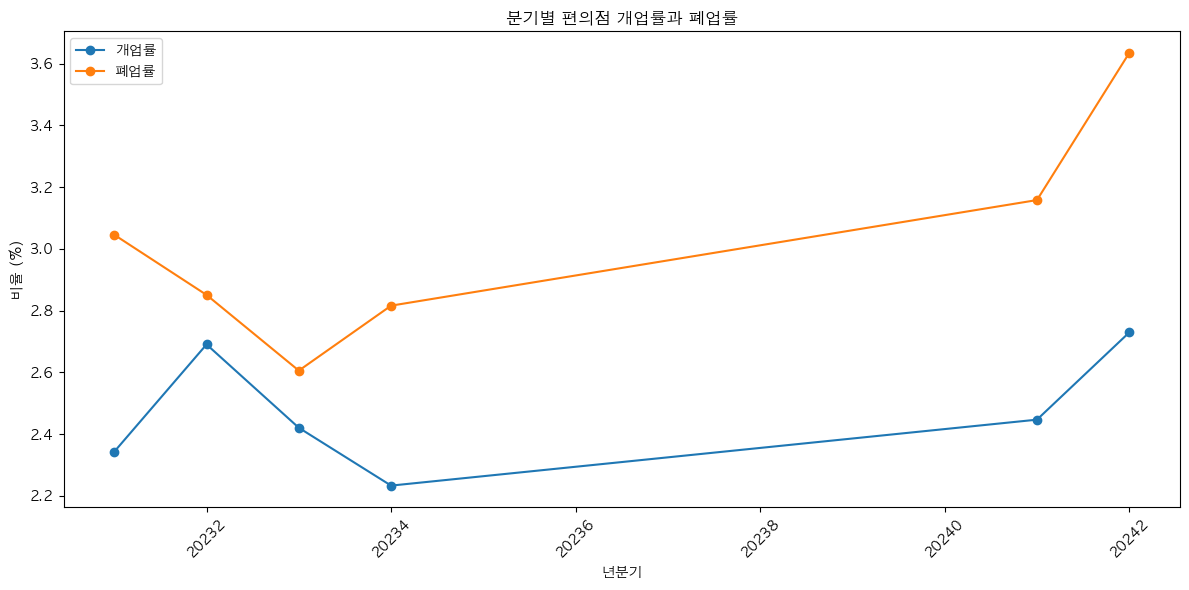


전체 기간 평균 개업률: 2.48%
전체 기간 평균 폐업률: 3.02%

최근 분기 (20242.0) 개업률: 2.73%
최근 분기 (20242.0) 폐업률: 3.63%

개업률 추세:
기울기: 0.0290, p-value: 0.5947

폐업률 추세:
기울기: 0.1165, p-value: 0.1990
개업률은 통계적으로 유의미한 추세를 보이지 않습니다.
폐업률은 통계적으로 유의미한 추세를 보이지 않습니다.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# pandas 디스플레이 옵션 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# 편의점 데이터만 필터링
convenience_store_data = data[data['서비스_업종_코드_명'] == '편의점']

# 분기별 집계
quarterly_data = convenience_store_data.groupby('기준_년분기_코드').agg({
    '유사_업종_점포_수': 'sum',
    '개업_점포_수': 'sum',
    '폐업_점포_수': 'sum'
}).reset_index()

# 개업률과 폐업률 계산
quarterly_data['개업률'] = (quarterly_data['개업_점포_수'] / quarterly_data['유사_업종_점포_수']) * 100
quarterly_data['폐업률'] = (quarterly_data['폐업_점포_수'] / quarterly_data['유사_업종_점포_수']) * 100

# 결과 출력
print("\n분기별 편의점 개업 및 폐업 현황:")
print(quarterly_data)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data['기준_년분기_코드'], quarterly_data['개업률'], label='개업률', marker='o')
plt.plot(quarterly_data['기준_년분기_코드'], quarterly_data['폐업률'], label='폐업률', marker='o')
plt.title('분기별 편의점 개업률과 폐업률')
plt.xlabel('년분기')
plt.ylabel('비율 (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 전체 기간 동안의 평균 개업률과 폐업률 계산
avg_opening_rate = quarterly_data['개업률'].mean()
avg_closure_rate = quarterly_data['폐업률'].mean()

print(f"\n전체 기간 평균 개업률: {avg_opening_rate:.2f}%")
print(f"전체 기간 평균 폐업률: {avg_closure_rate:.2f}%")

# 가장 최근 분기의 개업률과 폐업률
latest_quarter = quarterly_data.iloc[-1]
print(f"\n최근 분기 ({latest_quarter['기준_년분기_코드']}) 개업률: {latest_quarter['개업률']:.2f}%")
print(f"최근 분기 ({latest_quarter['기준_년분기_코드']}) 폐업률: {latest_quarter['폐업률']:.2f}%")

# 개업률과 폐업률의 추세 분석
from scipy import stats

# 선형 회귀 분석
slope_opening, intercept_opening, r_value_opening, p_value_opening, std_err_opening = stats.linregress(range(len(quarterly_data)), quarterly_data['개업률'])
slope_closing, intercept_closing, r_value_closing, p_value_closing, std_err_closing = stats.linregress(range(len(quarterly_data)), quarterly_data['폐업률'])

print("\n개업률 추세:")
print(f"기울기: {slope_opening:.4f}, p-value: {p_value_opening:.4f}")
print("\n폐업률 추세:")
print(f"기울기: {slope_closing:.4f}, p-value: {p_value_closing:.4f}")

if p_value_opening < 0.05:
    trend_opening = "증가" if slope_opening > 0 else "감소"
    print(f"개업률은 통계적으로 유의미한 {trend_opening} 추세를 보입니다.")
else:
    print("개업률은 통계적으로 유의미한 추세를 보이지 않습니다.")

if p_value_closing < 0.05:
    trend_closing = "증가" if slope_closing > 0 else "감소"
    print(f"폐업률은 통계적으로 유의미한 {trend_closing} 추세를 보입니다.")
else:
    print("폐업률은 통계적으로 유의미한 추세를 보이지 않습니다.")



분기별 편의점 개업 및 폐업 현황:
   기준_년분기_코드  유사_업종_점포_수  개업_점포_수  폐업_점포_수  개업률  폐업률  개업_대비_폐업률
0      20231        8110      190      247 2.34 3.05     130.00
1      20232        8103      218      231 2.69 2.85     105.96
2      20233        8098      196      211 2.42 2.61     107.65
3      20234        8061      180      227 2.23 2.82     126.11
4      20241        8011      196      253 2.45 3.16     129.08
5      20242        7951      217      289 2.73 3.63     133.18


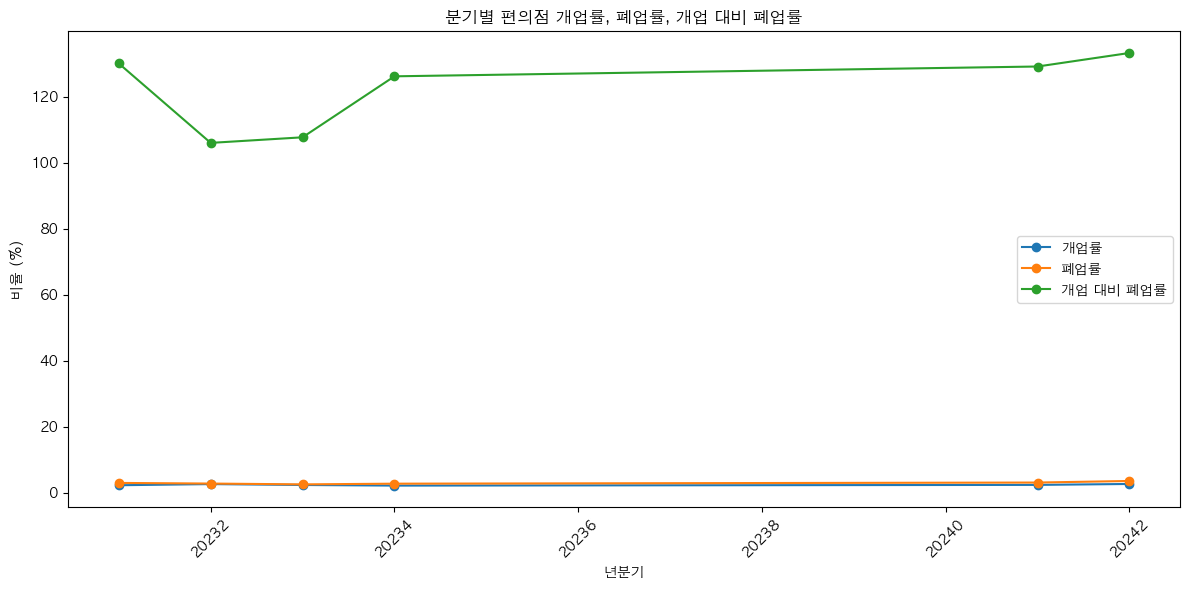


전체 기간 평균 개업률: 2.48%
전체 기간 평균 폐업률: 3.02%
전체 기간 평균 개업 대비 폐업률: 122.00%

최근 분기 (20242.0) 개업률: 2.73%
최근 분기 (20242.0) 폐업률: 3.63%
최근 분기 (20242.0) 개업 대비 폐업률: 133.18%

개업 대비 폐업률 추세:
기울기: 2.9632, p-value: 0.3560
개업 대비 폐업률은 통계적으로 유의미한 추세를 보이지 않습니다.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 편의점 데이터만 필터링
convenience_store_data = data[data['서비스_업종_코드_명'] == '편의점']

# 분기별 집계
quarterly_data = convenience_store_data.groupby('기준_년분기_코드').agg({
    '유사_업종_점포_수': 'sum',
    '개업_점포_수': 'sum',
    '폐업_점포_수': 'sum'
}).reset_index()

# 개업률, 폐업률, 그리고 개업 대비 폐업률 계산
quarterly_data['개업률'] = (quarterly_data['개업_점포_수'] / quarterly_data['유사_업종_점포_수']) * 100
quarterly_data['폐업률'] = (quarterly_data['폐업_점포_수'] / quarterly_data['유사_업종_점포_수']) * 100
quarterly_data['개업_대비_폐업률'] = (quarterly_data['폐업_점포_수'] / quarterly_data['개업_점포_수']) * 100

# 결과 출력
print("\n분기별 편의점 개업 및 폐업 현황:")
print(quarterly_data)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data['기준_년분기_코드'], quarterly_data['개업률'], label='개업률', marker='o')
plt.plot(quarterly_data['기준_년분기_코드'], quarterly_data['폐업률'], label='폐업률', marker='o')
plt.plot(quarterly_data['기준_년분기_코드'], quarterly_data['개업_대비_폐업률'], label='개업 대비 폐업률', marker='o')
plt.title('분기별 편의점 개업률, 폐업률, 개업 대비 폐업률')
plt.xlabel('년분기')
plt.ylabel('비율 (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 전체 기간 동안의 평균 개업률, 폐업률, 개업 대비 폐업률 계산
avg_opening_rate = quarterly_data['개업률'].mean()
avg_closure_rate = quarterly_data['폐업률'].mean()
avg_closure_to_opening_rate = quarterly_data['개업_대비_폐업률'].mean()

print(f"\n전체 기간 평균 개업률: {avg_opening_rate:.2f}%")
print(f"전체 기간 평균 폐업률: {avg_closure_rate:.2f}%")
print(f"전체 기간 평균 개업 대비 폐업률: {avg_closure_to_opening_rate:.2f}%")

# 가장 최근 분기의 개업률, 폐업률, 개업 대비 폐업률
latest_quarter = quarterly_data.iloc[-1]
print(f"\n최근 분기 ({latest_quarter['기준_년분기_코드']}) 개업률: {latest_quarter['개업률']:.2f}%")
print(f"최근 분기 ({latest_quarter['기준_년분기_코드']}) 폐업률: {latest_quarter['폐업률']:.2f}%")
print(f"최근 분기 ({latest_quarter['기준_년분기_코드']}) 개업 대비 폐업률: {latest_quarter['개업_대비_폐업률']:.2f}%")

# 개업 대비 폐업률 추세 분석
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(quarterly_data)), quarterly_data['개업_대비_폐업률'])

print("\n개업 대비 폐업률 추세:")
print(f"기울기: {slope:.4f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    trend = "증가" if slope > 0 else "감소"
    print(f"개업 대비 폐업률은 통계적으로 유의미한 {trend} 추세를 보입니다.")
else:
    print("개업 대비 폐업률은 통계적으로 유의미한 추세를 보이지 않습니다.")



분기별 편의점 개업 및 폐업 현황:
      기준_년분기  유사_업종_점포_수  개업_점포_수  폐업_점포_수  개업률  폐업률
0 2023-01-01        8110      190      247 2.34 3.05
1 2023-04-01        8103      218      231 2.69 2.85
2 2023-07-01        8098      196      211 2.42 2.61
3 2023-10-01        8061      180      227 2.23 2.82
4 2024-01-01        8011      196      253 2.45 3.16
5 2024-04-01        7951      217      289 2.73 3.63


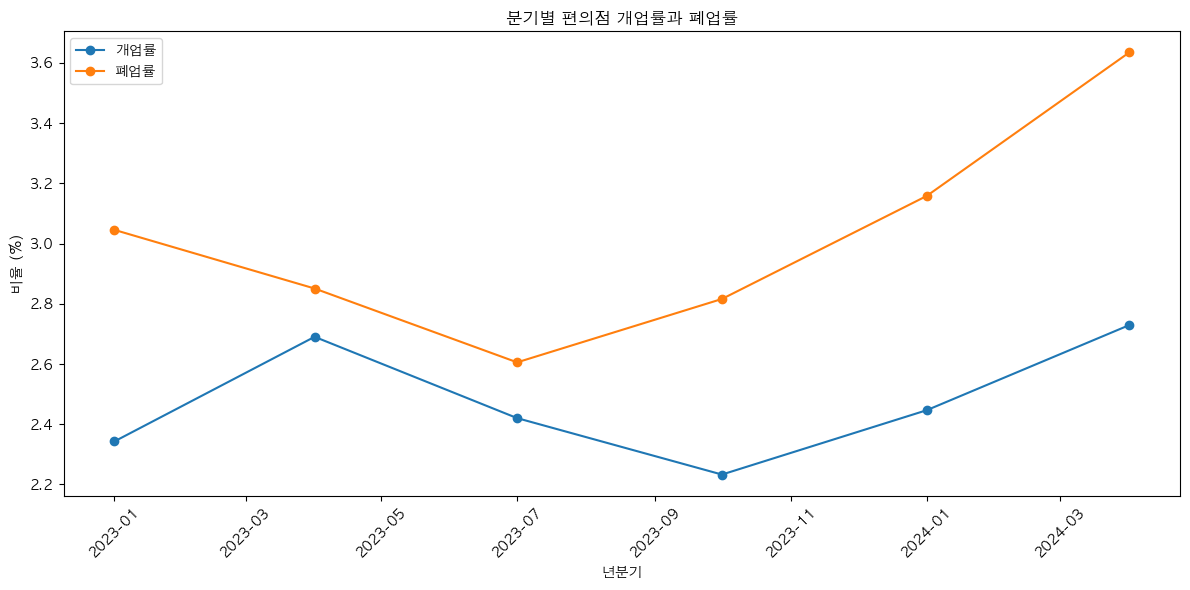


전체 기간 평균 개업률: 2.48%
전체 기간 평균 폐업률: 3.02%

최근 분기 (2024-04-01) 개업률: 2.73%
최근 분기 (2024-04-01) 폐업률: 3.63%


In [21]:
import pandas as pd

def year_quarter_to_date(year_quarter):
    year_quarter_str = str(year_quarter)
    year = int(year_quarter_str[:4])
    quarter = int(year_quarter_str[4])
    month = (quarter - 1) * 3 + 1
    return pd.to_datetime(f'{year}-{month:02d}-01')

# 편의점 데이터만 필터링
convenience_store_data = data[data['서비스_업종_코드_명'] == '편의점']

# 기준_년분기_코드를 datetime으로 변환
convenience_store_data['기준_년분기'] = convenience_store_data['기준_년분기_코드'].apply(year_quarter_to_date)

# 분기별 집계
quarterly_data = convenience_store_data.groupby('기준_년분기').agg({
    '유사_업종_점포_수': 'sum',
    '개업_점포_수': 'sum',
    '폐업_점포_수': 'sum'
}).reset_index()

# 개업률과 폐업률 계산
quarterly_data['개업률'] = (quarterly_data['개업_점포_수'] / quarterly_data['유사_업종_점포_수']) * 100
quarterly_data['폐업률'] = (quarterly_data['폐업_점포_수'] / quarterly_data['유사_업종_점포_수']) * 100

# 결과 출력
print("\n분기별 편의점 개업 및 폐업 현황:")
print(quarterly_data)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(quarterly_data['기준_년분기'], quarterly_data['개업률'], label='개업률', marker='o')
plt.plot(quarterly_data['기준_년분기'], quarterly_data['폐업률'], label='폐업률', marker='o')
plt.title('분기별 편의점 개업률과 폐업률')
plt.xlabel('년분기')
plt.ylabel('비율 (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 전체 기간 동안의 평균 개업률과 폐업률 계산
avg_opening_rate = quarterly_data['개업률'].mean()
avg_closure_rate = quarterly_data['폐업률'].mean()

print(f"\n전체 기간 평균 개업률: {avg_opening_rate:.2f}%")
print(f"전체 기간 평균 폐업률: {avg_closure_rate:.2f}%")

# 가장 최근 분기의 개업률과 폐업률
latest_quarter = quarterly_data.iloc[-1]
print(f"\n최근 분기 ({latest_quarter['기준_년분기'].strftime('%Y-%m-%d')}) 개업률: {latest_quarter['개업률']:.2f}%")
print(f"최근 분기 ({latest_quarter['기준_년분기'].strftime('%Y-%m-%d')}) 폐업률: {latest_quarter['폐업률']:.2f}%")


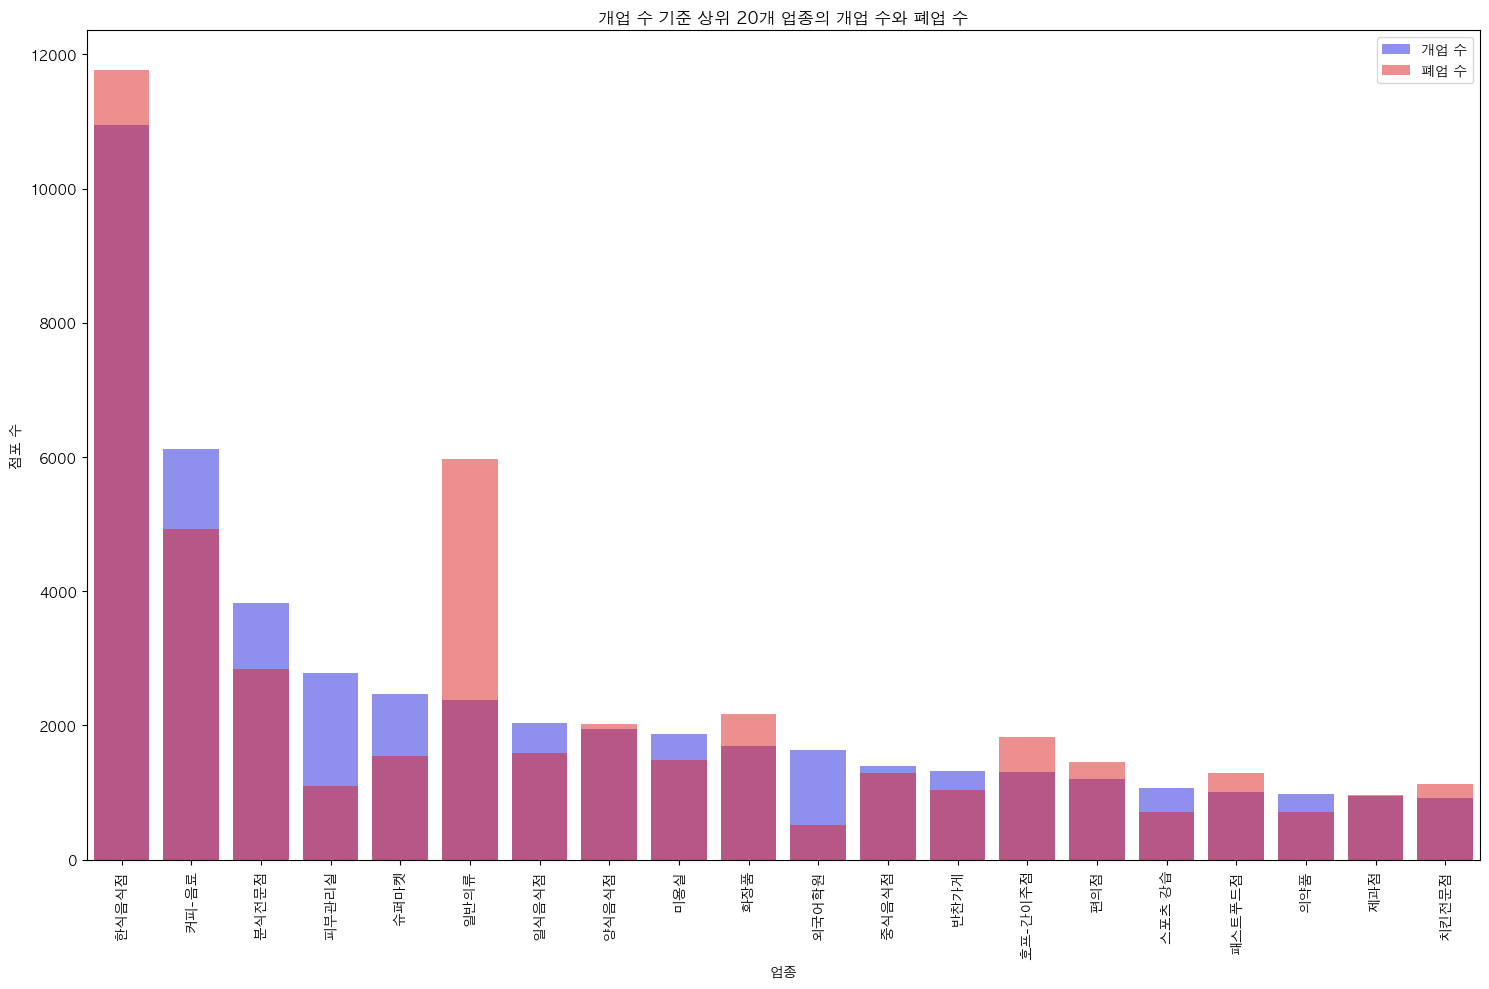

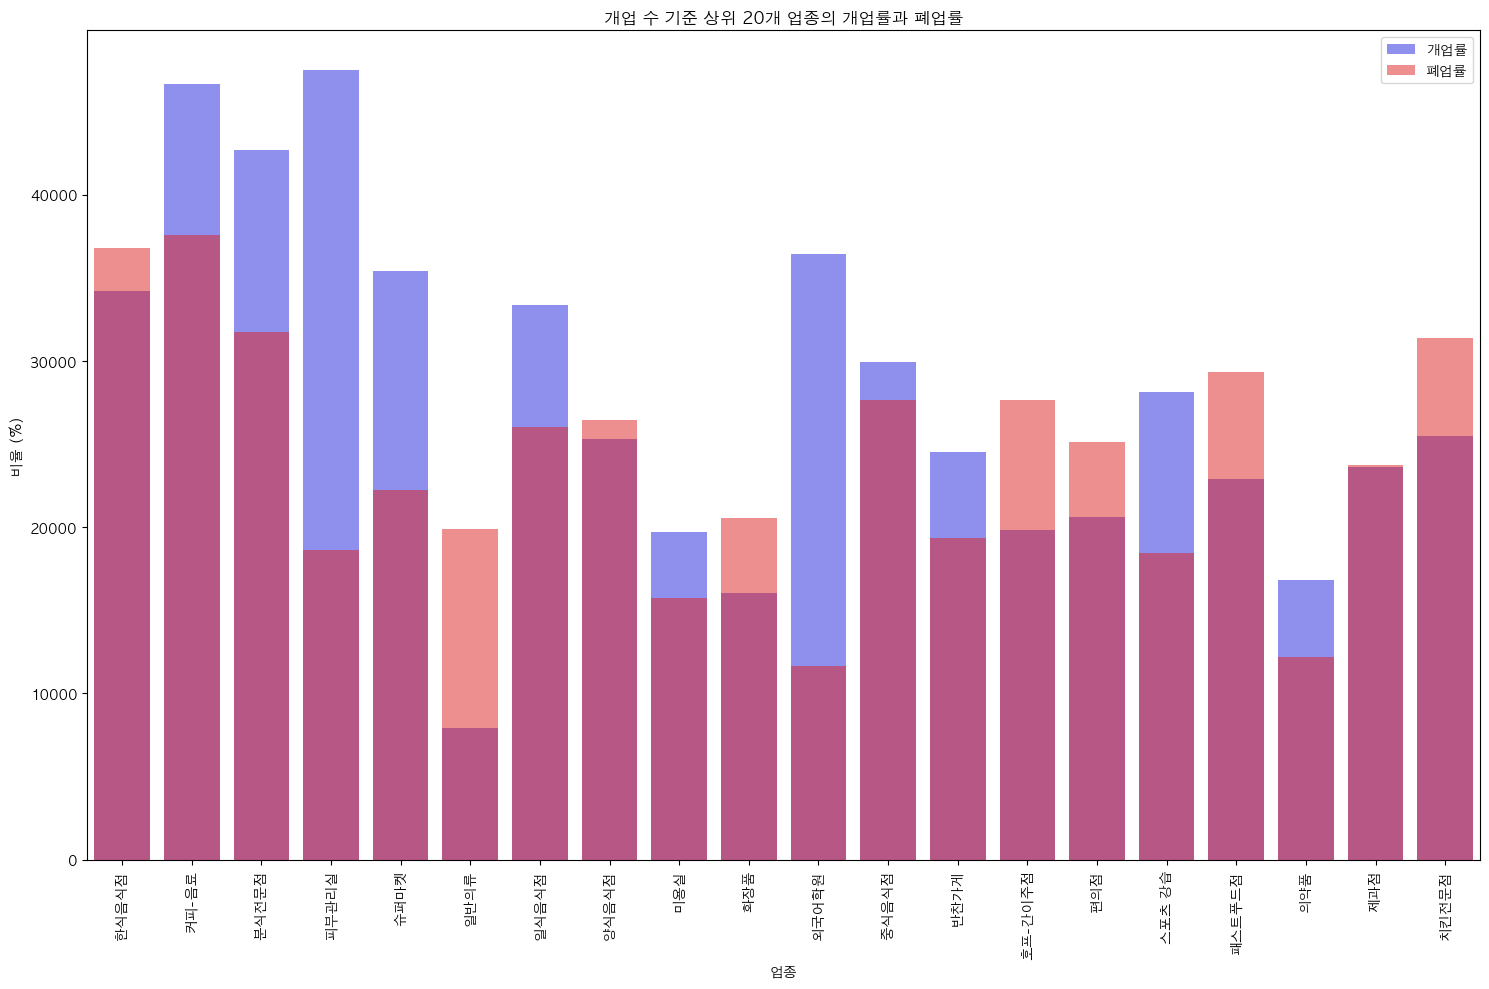


개업 수 기준 상위 20개 업종의 통계:
   서비스_업종_코드_명  유사_업종_점포_수  개업_점포_수  폐업_점포_수      개업률      폐업률
93       한식음식점       32.01    10954    11771 34224.11 36776.70
84       커피-음료       13.10     6113     4920 46676.28 37567.04
32       분식전문점        8.94     3817     2835 42715.55 31726.11
91       피부관리실        5.86     2787     1094 47524.07 18654.95
40        슈퍼마켓        6.96     2464     1547 35408.74 22231.05
63        일반의류       29.96     2380     5966  7942.74 19910.26
65       일식음식점        6.08     2029     1582 33357.75 26008.85
48       양식음식점        7.66     1940     2026 25312.28 26434.37
23         미용실        9.47     1867     1491 19713.52 15743.37
97         화장품       10.57     1698     2175 16068.04 20581.85
54       외국어학원        4.49     1637      522 36459.21 11625.97
79       중식음식점        4.66     1397     1290 29970.94 27675.38
25        반찬가게        5.40     1324     1044 24506.01 19323.47
96     호프-간이주점        6.61     1313     1830 19849.63 27665.52
90         편의점        5.80     

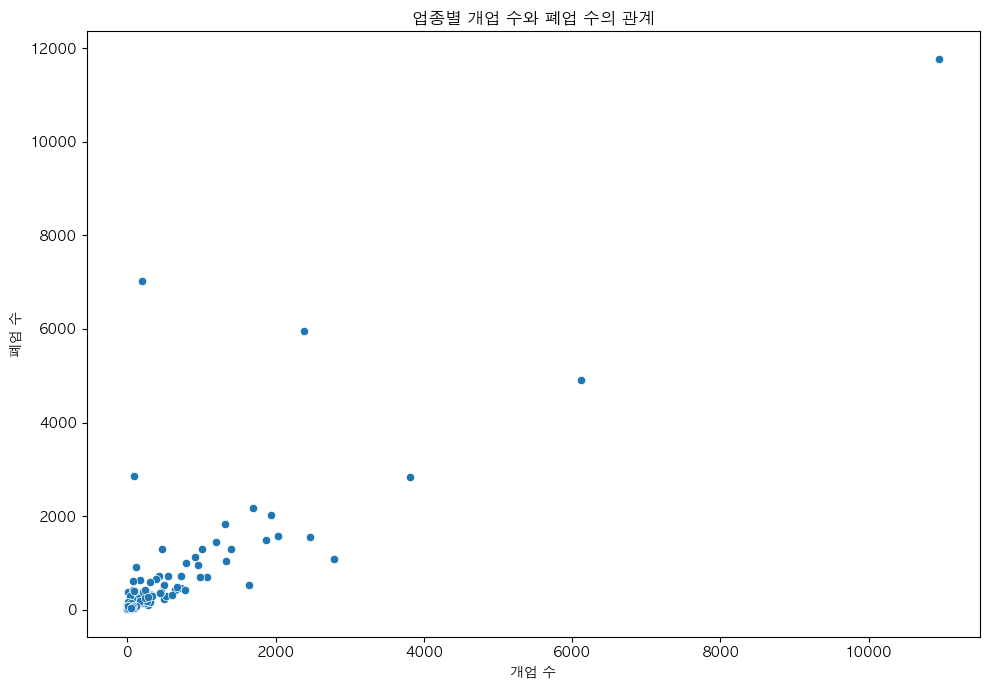

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pandas 디스플레이 옵션 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# 전체 기간 동안의 업종별 총 개업 수, 폐업 수, 평균 개업률과 폐업률 계산
industry_summary = data.groupby('서비스_업종_코드_명').agg({
    '유사_업종_점포_수': 'mean',
    '개업_점포_수': 'sum',
    '폐업_점포_수': 'sum'
}).reset_index()

# 개업률과 폐업률 계산
industry_summary['개업률'] = (industry_summary['개업_점포_수'] / industry_summary['유사_업종_점포_수']) * 100
industry_summary['폐업률'] = (industry_summary['폐업_점포_수'] / industry_summary['유사_업종_점포_수']) * 100

# 개업 수를 기준으로 상위 20개 업종 선택
top_20_industries = industry_summary.nlargest(20, '개업_점포_수')

# 시각화
plt.figure(figsize=(15, 10))
sns.barplot(x='서비스_업종_코드_명', y='개업_점포_수', data=top_20_industries, color='blue', alpha=0.5, label='개업 수')
sns.barplot(x='서비스_업종_코드_명', y='폐업_점포_수', data=top_20_industries, color='red', alpha=0.5, label='폐업 수')

plt.title('개업 수 기준 상위 20개 업종의 개업 수와 폐업 수')
plt.xlabel('업종')
plt.ylabel('점포 수')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# 개업률과 폐업률 시각화
plt.figure(figsize=(15, 10))
sns.barplot(x='서비스_업종_코드_명', y='개업률', data=top_20_industries, color='blue', alpha=0.5, label='개업률')
sns.barplot(x='서비스_업종_코드_명', y='폐업률', data=top_20_industries, color='red', alpha=0.5, label='폐업률')

plt.title('개업 수 기준 상위 20개 업종의 개업률과 폐업률')
plt.xlabel('업종')
plt.ylabel('비율 (%)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# 결과 출력
print("\n개업 수 기준 상위 20개 업종의 통계:")
print(top_20_industries[['서비스_업종_코드_명', '유사_업종_점포_수', '개업_점포_수', '폐업_점포_수', '개업률', '폐업률']])

# 전체 업종의 평균 개업률과 폐업률
overall_avg = industry_summary[['개업률', '폐업률']].mean()
print("\n전체 업종의 평균 개업률과 폐업률:")
print(overall_avg)

# 개업 수와 폐업 수의 상관관계 분석
correlation = industry_summary['개업_점포_수'].corr(industry_summary['폐업_점포_수'])
print(f"\n개업 수와 폐업 수의 상관계수: {correlation:.4f}")

# 산점도로 개업 수와 폐업 수의 관계 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x='개업_점포_수', y='폐업_점포_수', data=industry_summary)
plt.title('업종별 개업 수와 폐업 수의 관계')
plt.xlabel('개업 수')
plt.ylabel('폐업 수')
plt.tight_layout()
plt.show()



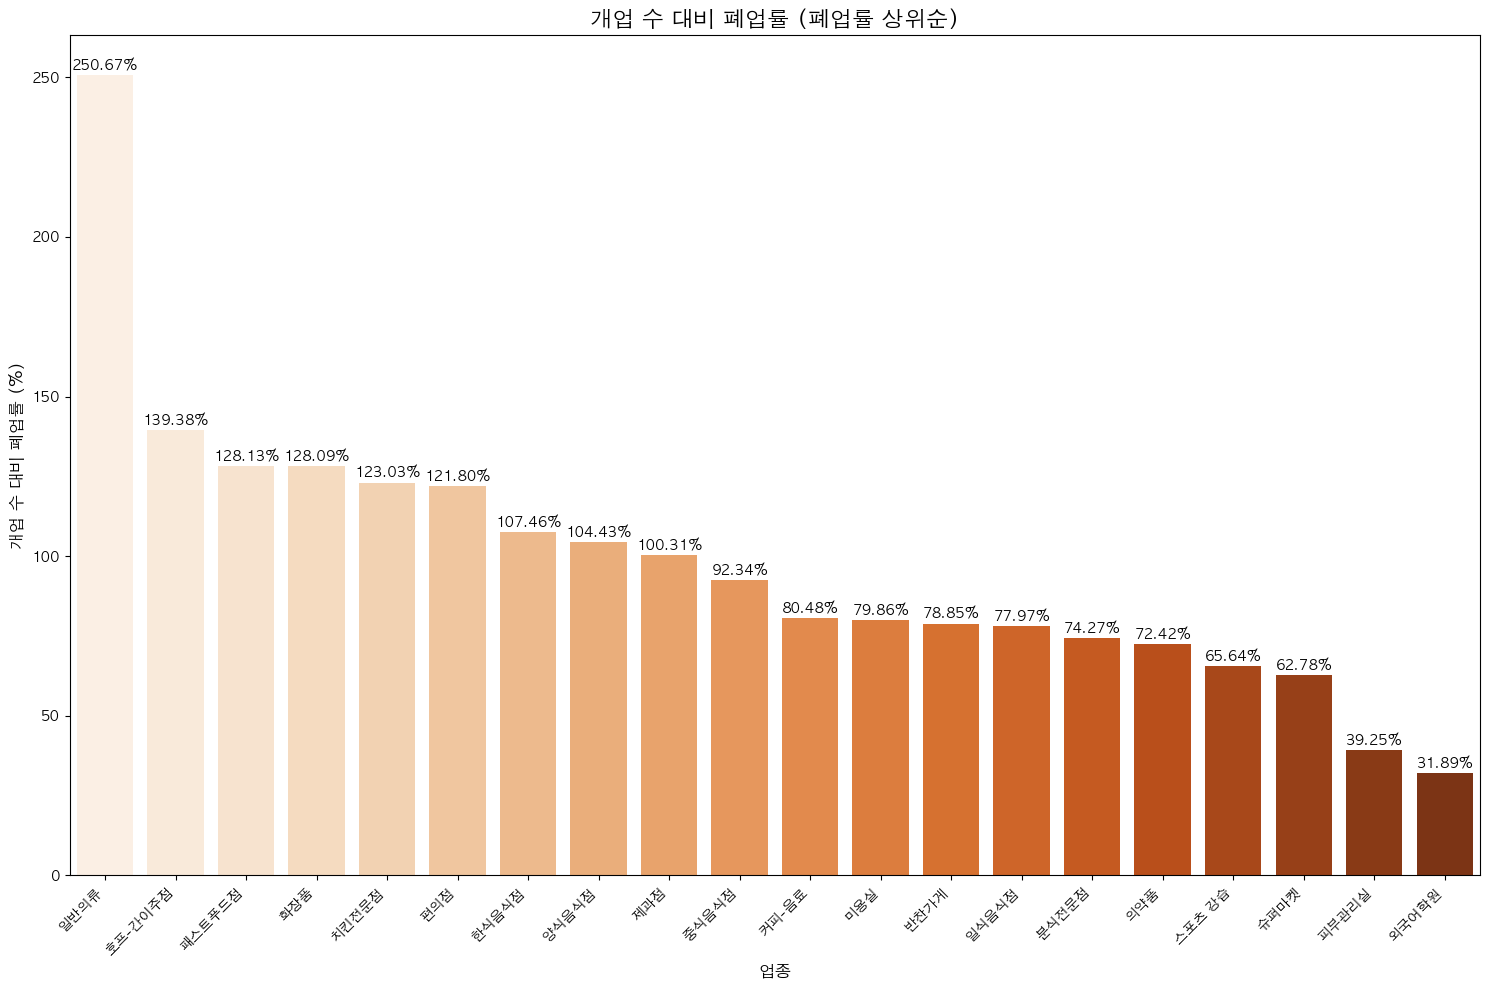


개업 수 기준 상위 20개 업종의 개업 수 대비 폐업률:
   서비스_업종_코드_명  개업_점포_수  폐업_점포_수  개업_대비_폐업률
63        일반의류     2380     5966     250.67
96     호프-간이주점     1313     1830     139.38
89      패스트푸드점     1013     1298     128.13
97         화장품     1698     2175     128.09
83       치킨전문점      912     1122     123.03
90         편의점     1197     1458     121.80
93       한식음식점    10954    11771     107.46
48       양식음식점     1940     2026     104.43
73         제과점      955      958     100.31
79       중식음식점     1397     1290      92.34
84       커피-음료     6113     4920      80.48
23         미용실     1867     1491      79.86
25        반찬가게     1324     1044      78.85
65       일식음식점     2029     1582      77.97
32       분식전문점     3817     2835      74.27
60         의약품      979      709      72.42
41      스포츠 강습     1071      703      65.64
40        슈퍼마켓     2464     1547      62.78
91       피부관리실     2787     1094      39.25
54       외국어학원     1637      522      31.89


In [26]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 개업 수 대비 폐업률 계산
top_20_industries['개업_대비_폐업률'] = (top_20_industries['폐업_점포_수'] / top_20_industries['개업_점포_수']) * 100

# 개업 수 대비 폐업률을 기준으로 내림차순 정렬
top_20_industries_sorted = top_20_industries.sort_values('개업_대비_폐업률', ascending=False)

# 시각화: 폐업률 상위순으로 좌측에서 나오게 하고, 색상과 스타일을 개선
plt.figure(figsize=(15, 10))
sns.barplot(x='서비스_업종_코드_명', y='개업_대비_폐업률', data=top_20_industries_sorted, palette='Oranges')

# 그래프 제목 및 축 레이블 설정
plt.title('개업 수 대비 폐업률 (폐업률 상위순)', fontsize=16)
plt.xlabel('업종', fontsize=12)
plt.ylabel('개업 수 대비 폐업률 (%)', fontsize=12)

# x축 레이블 회전 및 폰트 크기 조정
plt.xticks(rotation=45, ha='right', fontsize=10)

# 막대 위에 수치 표시 (소수점 2자리까지)
for i, v in enumerate(top_20_industries_sorted['개업_대비_폐업률']):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)

# 그래프 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

# 결과 출력
print("\n개업 수 기준 상위 20개 업종의 개업 수 대비 폐업률:")
print(top_20_industries_sorted[['서비스_업종_코드_명', '개업_점포_수', '폐업_점포_수', '개업_대비_폐업률']])


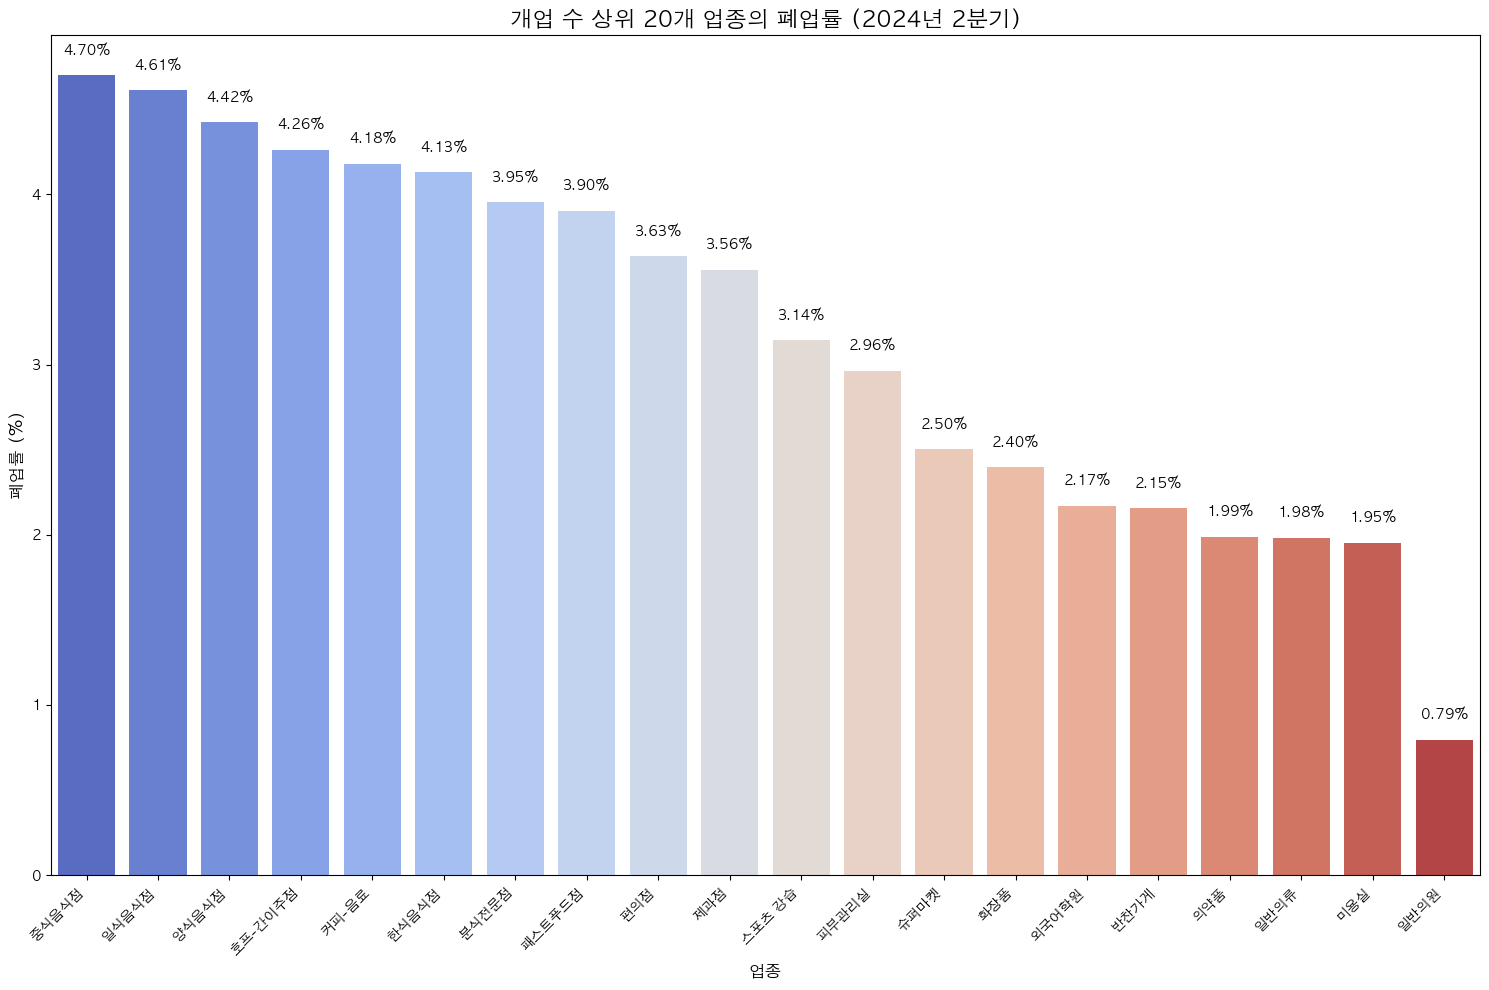


2024년 2분기 개업 수 상위 20개 업종의 폐업률:
   서비스_업종_코드_명  유사_업종_점포_수  개업_점포_수  폐업_점포_수  폐업률
79       중식음식점        5086      233      239 4.70
65       일식음식점        6721      378      310 4.61
48       양식음식점        8250      341      365 4.42
96     호프-간이주점        7274      262      310 4.26
84       커피-음료       19985      990      835 4.18
93       한식음식점       50880     2003     2101 4.13
32       분식전문점       13048      703      516 3.95
89      패스트푸드점        4688      187      183 3.90
90         편의점        7951      217      289 3.63
73         제과점        4497      185      160 3.56
41      스포츠 강습        4199      169      132 3.14
91       피부관리실        7290      525      216 2.96
40        슈퍼마켓       10635      529      266 2.50
97         화장품       13861      238      332 2.40
54       외국어학원        4241      235       92 2.17
25        반찬가게        7518      259      162 2.15
60         의약품        7245      184      144 1.99
63        일반의류       42938      455      851 1.98
23         미용실    

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2024년 2분기 데이터만 필터링
q2_2024_data = data[data['기준_년분기_코드'] == 20242]

# 전체 업종별 집계
industry_summary_q2_2024 = q2_2024_data.groupby('서비스_업종_코드_명').agg({
    '유사_업종_점포_수': 'sum',
    '개업_점포_수': 'sum',
    '폐업_점포_수': 'sum'
}).reset_index()

# 폐업률 계산 (0으로 나누는 경우 방지)
industry_summary_q2_2024['폐업률'] = np.where(
    industry_summary_q2_2024['유사_업종_점포_수'] != 0,
    (industry_summary_q2_2024['폐업_점포_수'] / industry_summary_q2_2024['유사_업종_점포_수']) * 100,
    np.nan
)

# 개업 수 기준 상위 20개 업종 선택
top_20_industries = industry_summary_q2_2024.nlargest(20, '개업_점포_수')

# 폐업률 기준으로 정렬
top_20_industries_sorted = top_20_industries.sort_values('폐업률', ascending=False)

# 시각화
plt.figure(figsize=(15, 10))
sns.barplot(x='서비스_업종_코드_명', y='폐업률', data=top_20_industries_sorted, palette='coolwarm')

plt.title('개업 수 상위 20개 업종의 폐업률 (2024년 2분기)', fontsize=16)
plt.xlabel('업종', fontsize=12)
plt.ylabel('폐업률 (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# 막대 위에 수치 표시 (소수점 2자리까지)
for i, v in enumerate(top_20_industries_sorted['폐업률']):
    if np.isfinite(v):  # 유한한 값만 표시
        plt.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 결과 출력
print("\n2024년 2분기 개업 수 상위 20개 업종의 폐업률:")
print(top_20_industries_sorted[['서비스_업종_코드_명', '유사_업종_점포_수', '개업_점포_수', '폐업_점포_수', '폐업률']])



In [5]:
sorted_data = industry_summary.sort_values('점포_수', ascending=False)

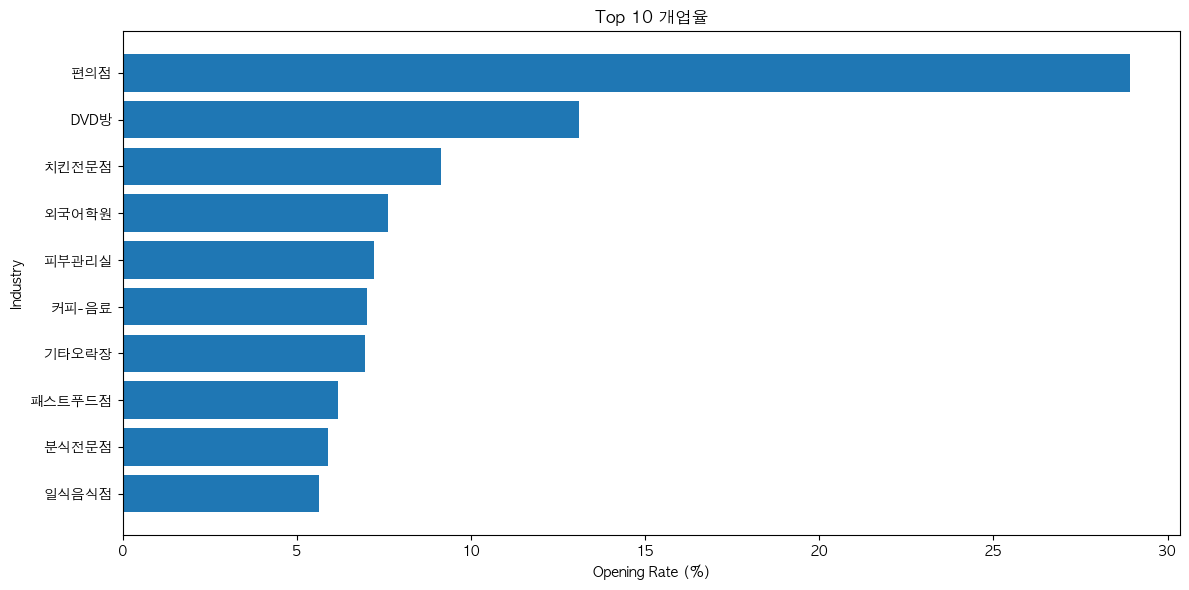

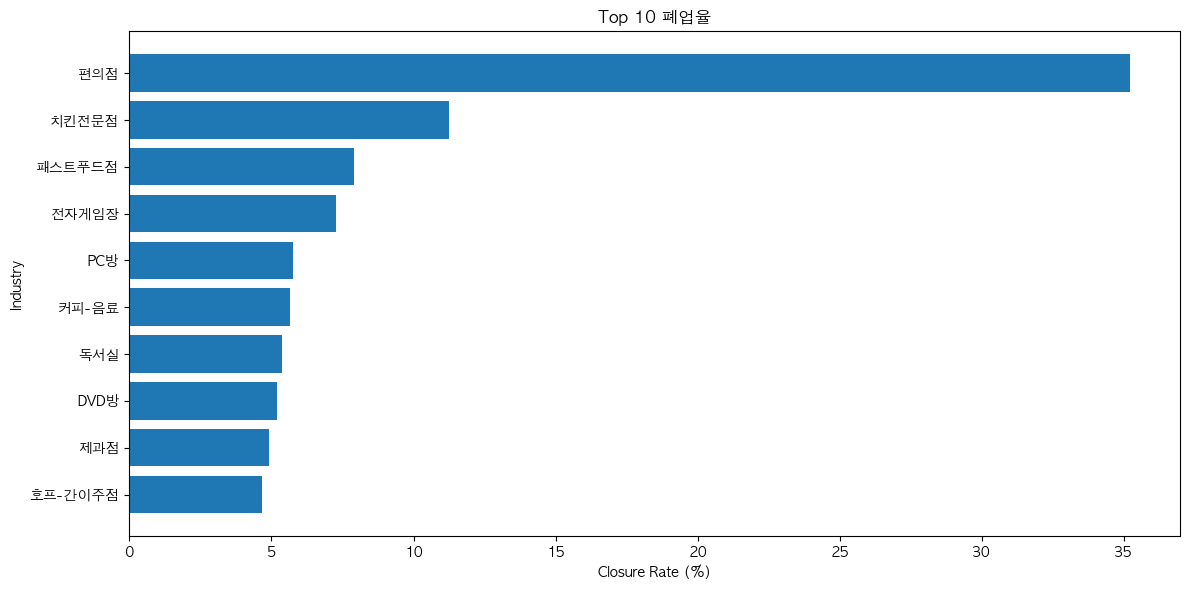

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 정렬
top_opening = industry_summary.sort_values('개업률', ascending=False).head(10)
top_closing = industry_summary.sort_values('폐업률', ascending=False).head(10)

# 개업률 상위 10개 업종 시각화
plt.figure(figsize=(12, 6))
plt.barh(top_opening['서비스_업종_코드_명'], top_opening['개업률'])
plt.title('Top 10 개업율')
plt.xlabel('Opening Rate (%)')
plt.ylabel('Industry')
plt.gca().invert_yaxis()  # 위에서부터 내림차순 정렬
plt.tight_layout()
plt.show()

# 폐업률 상위 10개 업종 시각화
plt.figure(figsize=(12, 6))
plt.barh(top_closing['서비스_업종_코드_명'], top_closing['폐업률'])
plt.title('Top 10 폐업율')
plt.xlabel('Closure Rate (%)')
plt.ylabel('Industry')
plt.gca().invert_yaxis()  # 위에서부터 내림차순 정렬
plt.tight_layout()
plt.show()


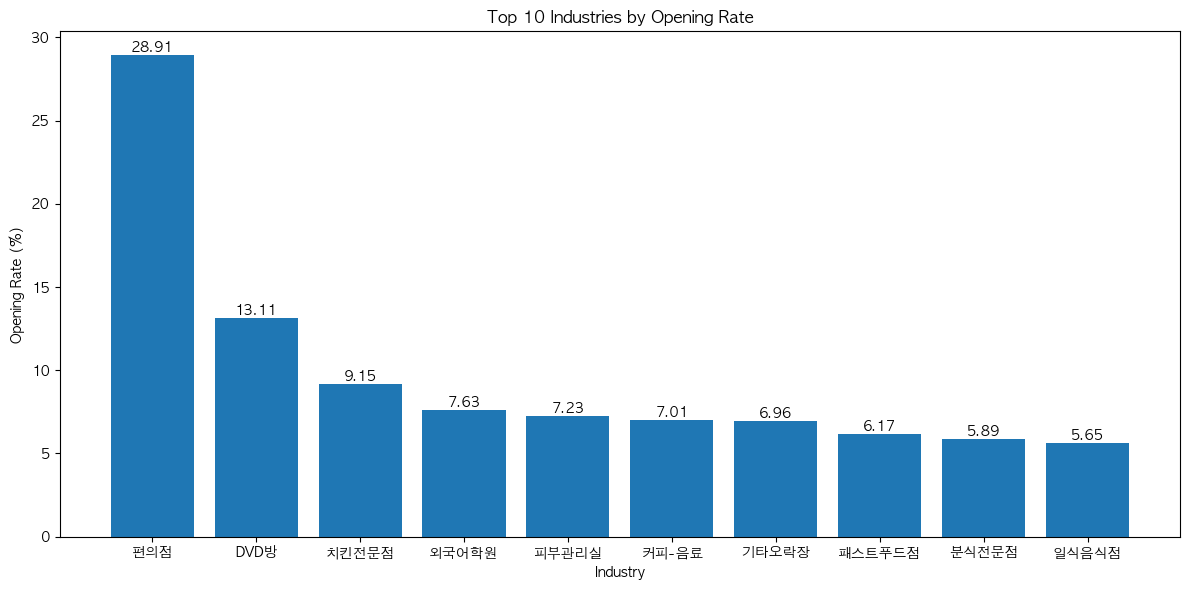

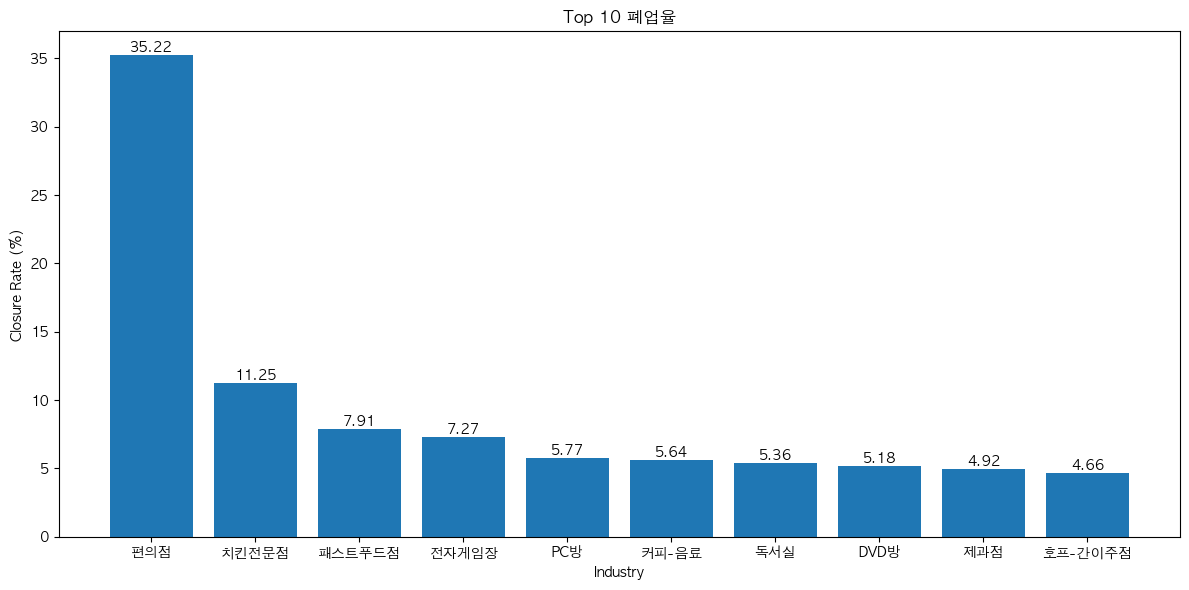

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 정렬
top_opening = industry_summary.sort_values('개업률', ascending=False).head(10)
top_closing = industry_summary.sort_values('폐업률', ascending=False).head(10)

# 개업률 상위 10개 업종 시각화 (수직 막대 그래프)
plt.figure(figsize=(12, 6))
bars = plt.bar(top_opening['서비스_업종_코드_명'], top_opening['개업률'])
plt.title('Top 10 Industries by Opening Rate')
plt.ylabel('Opening Rate (%)')
plt.xlabel('Industry')

# 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 폐업률 상위 10개 업종 시각화 (수직 막대 그래프)
plt.figure(figsize=(12, 6))
bars = plt.bar(top_closing['서비스_업종_코드_명'], top_closing['폐업률'])
plt.title('Top 10 폐업율')
plt.ylabel('Closure Rate (%)')
plt.xlabel('Industry')

# 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [24]:
sorted_data[['서비스_업종_코드_명', '점포_수', '개업_점포_수', '폐업_점포_수', '개업률', '폐업률']]

,서비스_업종_코드_명,점포_수,개업_점포_수,폐업_점포_수,개업률,폐업률
93,한식음식점,281078,10954,11771,3.90,4.19
63,일반의류,266513,2380,5966,0.89,2.24
72,전자상거래업,196989,203,7029,0.10,3.57
31,부동산중개업,124387,90,2866,0.07,2.30
84,커피-음료,87214,6113,4920,7.01,5.64
97,화장품,78926,1698,2175,2.15,2.76
23,미용실,77570,1867,1491,2.41,1.92
32,분식전문점,64818,3817,2835,5.89,4.37
40,슈퍼마켓,59990,2464,1547,4.11,2.58
85,컴퓨터및주변장치판매,48606,302,603,0.62,1.24


In [20]:
industry_summary['성장률'] = industry_summary['개업률'] - industry_summary['폐업률']
sorted_data2= industry_summary.sort_values('성장률', ascending=False)

In [23]:
sorted_data2[['성장률','서비스_업종_코드_명', '점포_수', '개업_점포_수', '폐업_점포_수', '개업률', '폐업률']]

,성장률,서비스_업종_코드_명,점포_수,개업_점포_수,폐업_점포_수,개업률,폐업률
0,7.93,DVD방,2105,276,109,13.11,5.18
54,5.20,외국어학원,21454,1637,522,7.63,2.43
91,4.39,피부관리실,38540,2787,1094,7.23,2.84
12,3.64,기타오락장,7054,491,234,6.96,3.32
47,2.66,애완동물,10779,603,316,5.59,2.93
49,1.58,여관,16366,726,468,4.44,2.86
41,1.56,스포츠 강습,23655,1071,703,4.53,2.97
40,1.53,슈퍼마켓,59990,2464,1547,4.11,2.58
32,1.52,분식전문점,64818,3817,2835,5.89,4.37
20,1.46,모터사이클수리,3144,83,37,2.64,1.18


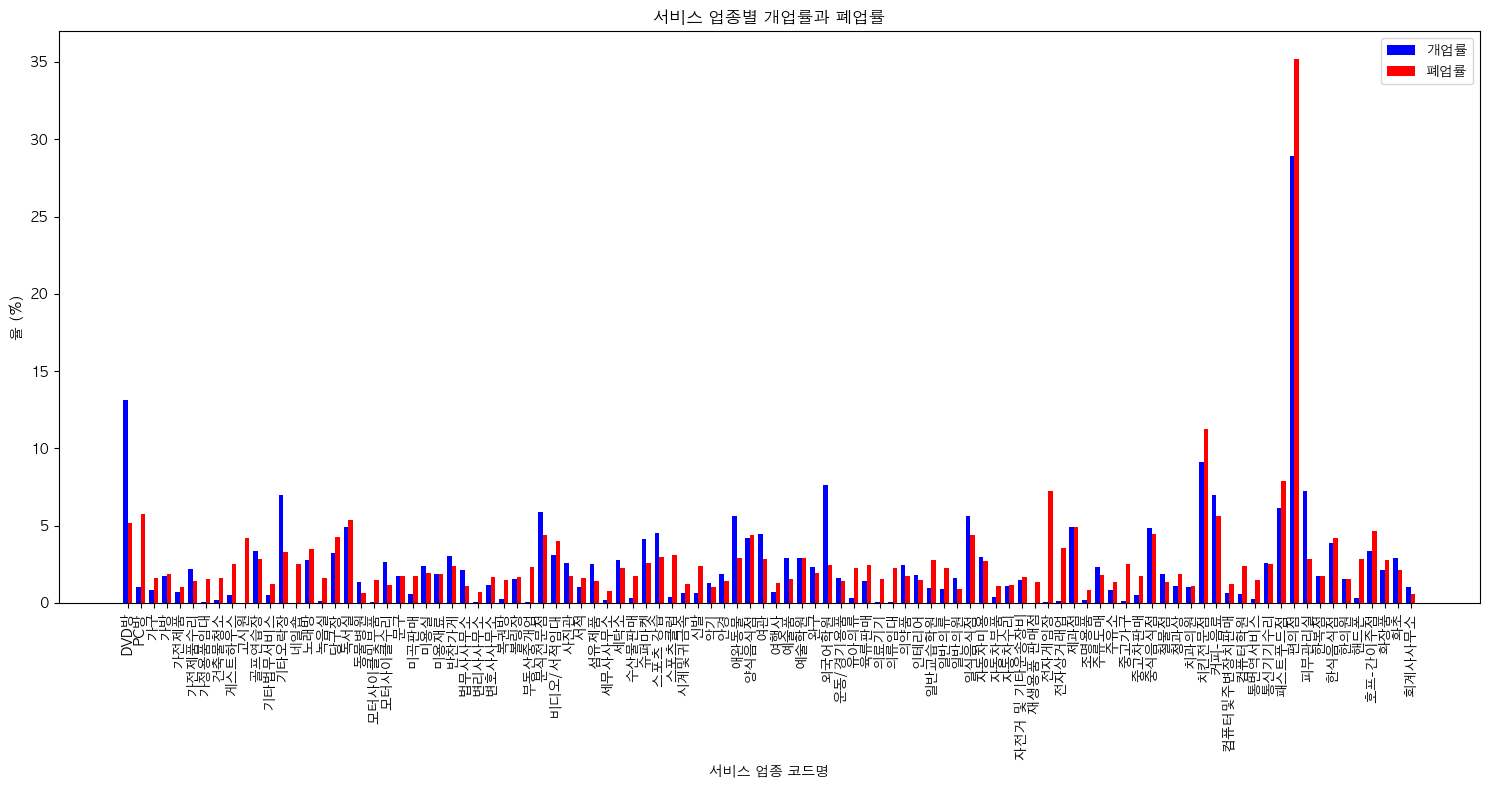


상위 10개 업종 (점포 수 기준):
   서비스_업종_코드_명    점포_수  개업_점포_수  폐업_점포_수  개업률  폐업률
93       한식음식점  281078    10954    11771 3.90 4.19
63        일반의류  266513     2380     5966 0.89 2.24
72      전자상거래업  196989      203     7029 0.10 3.57
31      부동산중개업  124387       90     2866 0.07 2.30
84       커피-음료   87214     6113     4920 7.01 5.64
97         화장품   78926     1698     2175 2.15 2.76
23         미용실   77570     1867     1491 2.41 1.92
32       분식전문점   64818     3817     2835 5.89 4.37
40        슈퍼마켓   59990     2464     1547 4.11 2.58
85  컴퓨터및주변장치판매   48606      302      603 0.62 1.24


In [17]:
# 그래프 시각화
plt.figure(figsize=(15, 8))
bar_width = 0.35
index = range(len(industry_summary))

plt.bar(index, industry_summary['개업률'], bar_width, label='개업률', color='blue')
plt.bar([i + bar_width for i in index], industry_summary['폐업률'], bar_width, label='폐업률', color='red')

plt.xlabel('서비스 업종 코드명')
plt.ylabel('율 (%)')
plt.title('서비스 업종별 개업률과 폐업률')
plt.xticks([i + bar_width/2 for i in index], industry_summary['서비스_업종_코드_명'], rotation=90, ha='center')
plt.legend()

plt.tight_layout()
plt.show()

# 상위 10개 업종 (점포 수 기준) 출력
print("\n상위 10개 업종 (점포 수 기준):")
print(industry_summary.sort_values('점포_수', ascending=False).head(10)[['서비스_업종_코드_명', '점포_수', '개업_점포_수', '폐업_점포_수', '개업률', '폐업률']])

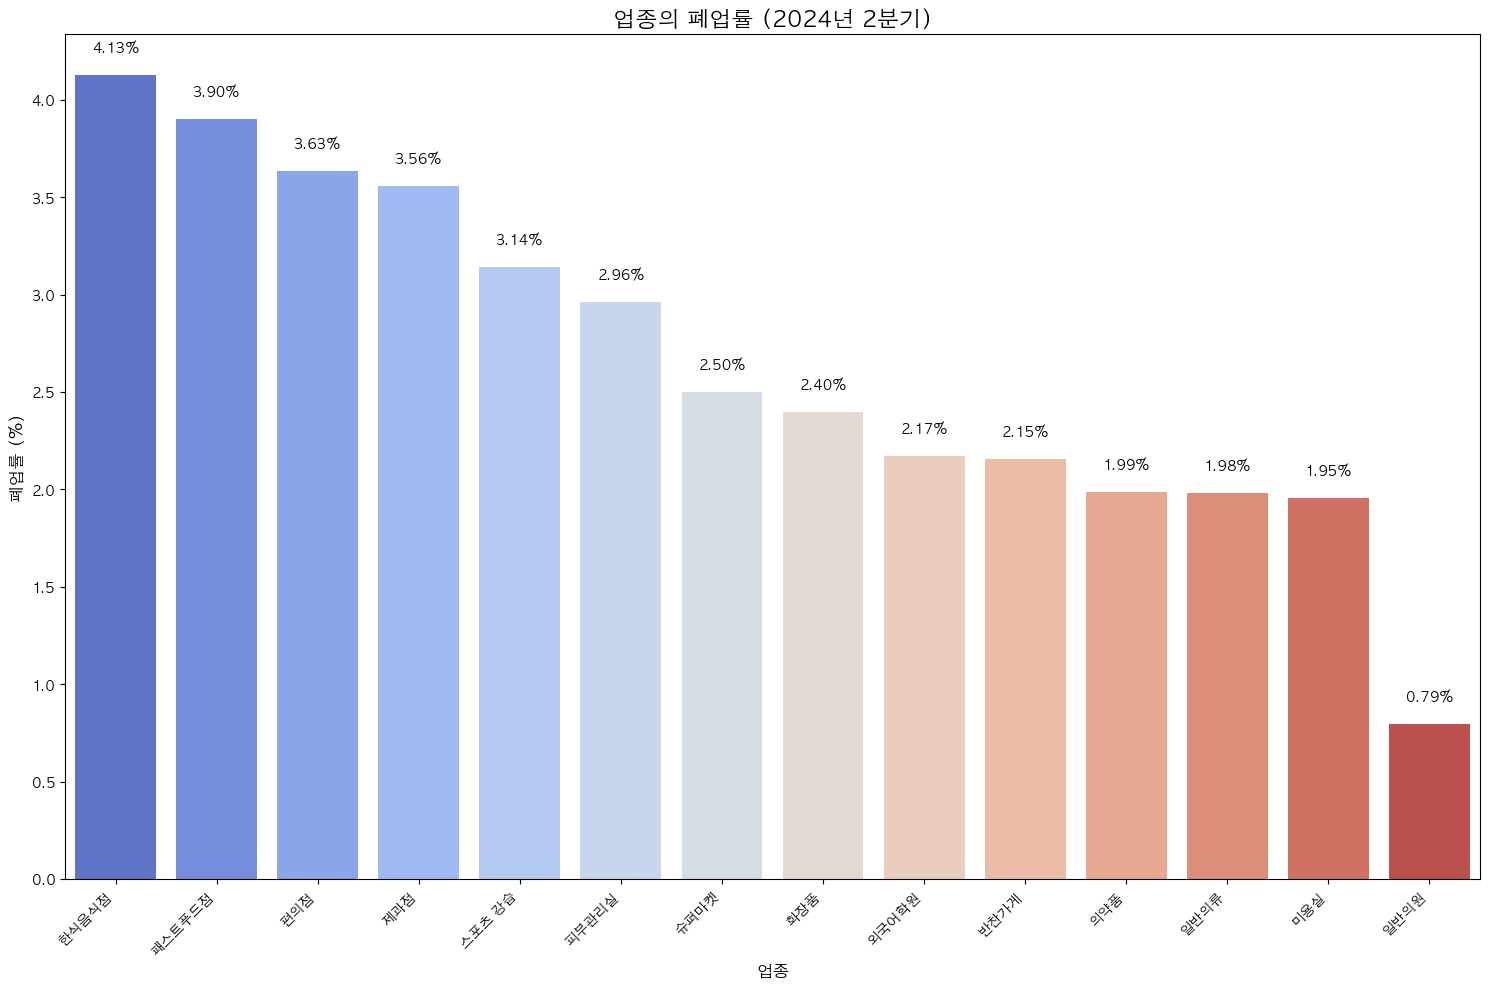


2024년 2분기 선별된 업종의 폐업률:
   서비스_업종_코드_명  유사_업종_점포_수  개업_점포_수  폐업_점포_수  폐업률
93       한식음식점       50880     2003     2101 4.13
89      패스트푸드점        4688      187      183 3.90
90         편의점        7951      217      289 3.63
73         제과점        4497      185      160 3.56
41      스포츠 강습        4199      169      132 3.14
91       피부관리실        7290      525      216 2.96
40        슈퍼마켓       10635      529      266 2.50
97         화장품       13861      238      332 2.40
54       외국어학원        4241      235       92 2.17
25        반찬가게        7518      259      162 2.15
60         의약품        7245      184      144 1.99
63        일반의류       42938      455      851 1.98
23         미용실       13926      325      272 1.95
64        일반의원        8181      160       65 0.79


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2024년 2분기 데이터만 필터링
q2_2024_data = data[data['기준_년분기_코드'] == 20242]

# 전체 업종별 집계
industry_summary_q2_2024 = q2_2024_data.groupby('서비스_업종_코드_명').agg({
    '유사_업종_점포_수': 'sum',
    '개업_점포_수': 'sum',
    '폐업_점포_수': 'sum'
}).reset_index()

# 폐업률 계산 (0으로 나누는 경우 방지)
industry_summary_q2_2024['폐업률'] = np.where(
    industry_summary_q2_2024['유사_업종_점포_수'] != 0,
    (industry_summary_q2_2024['폐업_점포_수'] / industry_summary_q2_2024['유사_업종_점포_수']) * 100,
    np.nan
)

# 개업 수 기준 상위 20개 업종 선택
top_20_industries = industry_summary_q2_2024.nlargest(20, '개업_점포_수')

# 제외할 업종 리스트
exclude_list = ['음식점', '주점', '분식전문점', '커피-음료']

# 필터링: '음식점'(한식음식점 제외), '주점', '분식 전문점'을 제외
filtered_industries = top_20_industries[
    ~(top_20_industries['서비스_업종_코드_명'].str.contains('|'.join(exclude_list)) & 
      (top_20_industries['서비스_업종_코드_명'] != '한식음식점'))
]

# 폐업률 기준으로 정렬
filtered_industries_sorted = filtered_industries.sort_values('폐업률', ascending=False)

# 시각화
plt.figure(figsize=(15, 10))
sns.barplot(x='서비스_업종_코드_명', y='폐업률', data=filtered_industries_sorted, palette='coolwarm')

plt.title('업종의 폐업률 (2024년 2분기)', fontsize=16)
plt.xlabel('업종', fontsize=12)
plt.ylabel('폐업률 (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# 막대 위에 수치 표시 (소수점 2자리까지)
for i, v in enumerate(filtered_industries_sorted['폐업률']):
    if np.isfinite(v):  # 유한한 값만 표시
        plt.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 결과 출력
print("\n2024년 2분기 선별된 업종의 폐업률:")
print(filtered_industries_sorted[['서비스_업종_코드_명', '유사_업종_점포_수', '개업_점포_수', '폐업_점포_수', '폐업률']])


In [34]:

# 2024년 2분기 데이터 필터링
data_2024_q2 = data[data['기준_년분기_코드'] == 20242]

# 편의점 데이터만 필터링
convenience_store_data = data_2024_q2[data_2024_q2['서비스_업종_코드_명'] == '편의점']

# 유사 업종 점포수 합계 계산
similar_store_sum = convenience_store_data['유사_업종_점포_수'].sum()

# 편의점의 총 점포수와 프랜차이즈 점포수의 합계 계산
total_and_franchise_sum = convenience_store_data['점포_수'].sum() + convenience_store_data['프랜차이즈_점포_수'].sum()

print(f"24년 2분기 편의점의 유사 업종 점포 수 합계: {similar_store_sum}")
print(f"24년 2분기 편의점의 총 점포 수 + 프랜차이즈 점포 수 합계: {total_and_franchise_sum}")



24년 2분기 편의점의 유사 업종 점포 수 합계: 7951
24년 2분기 편의점의 총 점포 수 + 프랜차이즈 점포 수 합계: 7951


23년 1분기 편의점의 유사 업종 점포 수 합계: 8110
23년 1분기 편의점의 총 점포 수 + 프랜차이즈 점포 수 합계: 8110


159